# FNN: Feed Forward Neural Network:

### 1. Classification Problem

In [11]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.models import Sequential 
from keras.layers import Dense

In [4]:
# Load the dataset:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Preprocess the data:
# Encode the data:
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

In [9]:
# Create a binary target variable for binary classification
median_bill = tips['total_bill'].median()  # Corrected method name
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int)

# Split the data into training and test sets
X = tips.drop(['total_bill', 'high_bill'], axis=1)
y = tips['high_bill']  # Corrected: select only the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,high_bill
0,16.99,1.01,0,0,2,0,2,0
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [20]:
# Build the Neural Network:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

# Train the model:
model.fit(X_train,y_train, epochs=10, batch_size=32)

# Evaluate the model:
loss, accuracy = model.evaluate(X_test,y_test)
print('Test accuracy: %.2f' % (accuracy*100))

Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 0.6652 - accuracy: 0.6359
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6562 - accuracy: 0.6256
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6308
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6410
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6410
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.6667
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.6872
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.6974
Epoch 10/10
2/2 [==============================] - 1s 13ms/step - loss: 0.6190 - accuracy: 0.7143
Test accuracy: 71.43


# MultiClass Classification:

In [21]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.models import Sequential 
from keras.layers import Dense

In [23]:
# Preprocess the data:
# Encode the data:
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

In [24]:
# Split the data into training and test sets
X = tips.drop(['day'], axis=1)
y = tips['day']  # Corrected: select only the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# Build the model:
# Build the Neural Network:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.unique().shape[0], activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

# Train the model:
model.fit(X_train,y_train, epochs=10, batch_size=32)

# Evaluate the model:
loss, accuracy = model.evaluate(X_test,y_test)
print('Test accuracy: %.2f' % (accuracy*100))

Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 1.4016 - accuracy: 0.2718
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 1.3388 - accuracy: 0.3692
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 1.2909 - accuracy: 0.4154
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 1.2421 - accuracy: 0.4205
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 1.1974 - accuracy: 0.4615
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 1.1570 - accuracy: 0.4769
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 1.1146 - accuracy: 0.5385
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 1.0784 - accuracy: 0.6154
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 1.0413 - accuracy: 0.6256
Epoch 10/10
2/2 [==============================] - 0s 14ms/step - loss: 0.9510 - accuracy: 0.6531
Test accuracy: 65.31


# History:

Epoch 1/50
5/5 [==============================] - 0s 69ms/step - loss: 0.9723 - accuracy: 0.6154 - val_loss: 0.9737 - val_accuracy: 0.6923
Epoch 2/50
5/5 [==============================] - 0s 26ms/step - loss: 0.9480 - accuracy: 0.6154 - val_loss: 0.9524 - val_accuracy: 0.6923
Epoch 3/50
5/5 [==============================] - 0s 29ms/step - loss: 0.9258 - accuracy: 0.6282 - val_loss: 0.9328 - val_accuracy: 0.7692
Epoch 4/50
5/5 [==============================] - 0s 28ms/step - loss: 0.9045 - accuracy: 0.6346 - val_loss: 0.9155 - val_accuracy: 0.7436
Epoch 5/50
5/5 [==============================] - 0s 31ms/step - loss: 0.8854 - accuracy: 0.6474 - val_loss: 0.9008 - val_accuracy: 0.7436
Epoch 6/50
5/5 [==============================] - 0s 30ms/step - loss: 0.8657 - accuracy: 0.6731 - val_loss: 0.8879 - val_accuracy: 0.7179
Epoch 7/50
5/5 [==============================] - 0s 52ms/step - loss: 0.8488 - accuracy: 0.6795 - val_loss: 0.8773 - val_accuracy: 0.6923
Epoch 8/50
5/5 [===========

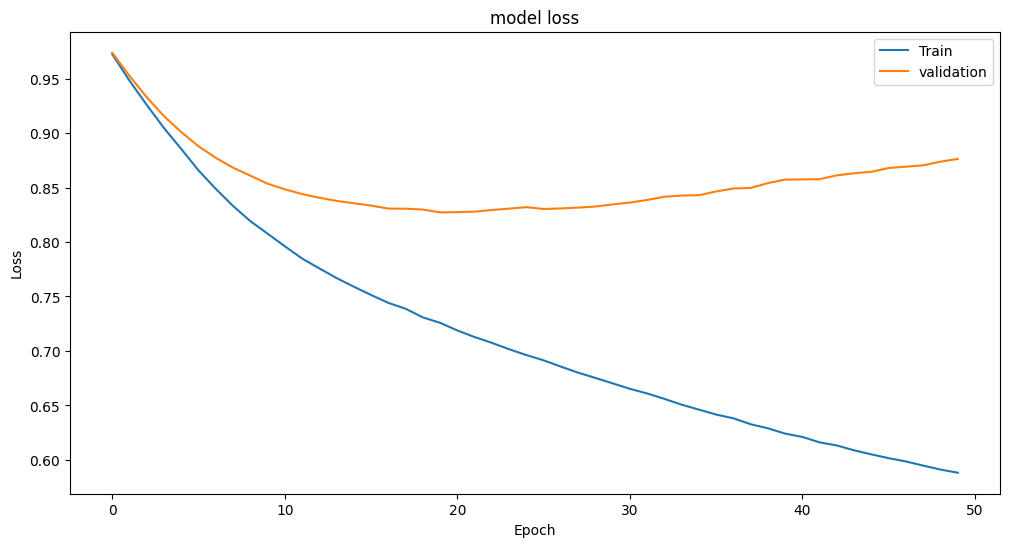

In [27]:
import matplotlib.pyplot as plt
# Train the model and store the history:

history = model.fit(X_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

# PLot the training and validation loss values:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper right')

plt.show()

In [ ]:
()